# Problem Statement

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [96]:
ship = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
ship

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [97]:
ship.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [98]:
ship.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The titanic dataset has three columns with missing values: Age (approx. 19%), Embarked (approx. 0.2%) and Cabin (approx. 77 %)

In [99]:
# fill null values
ship['Age'] = ship['Age'].fillna((ship['Age'].median()))

In [100]:
ship

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [101]:
ship.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [102]:
# fill null values of embarked column
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [103]:
ship['Embarked'] = imp.fit_transform(ship['Embarked'].values.reshape(-1,1))

In [104]:
ship

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [105]:
ship.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [106]:
# cabin has more than 75% null values, so it's better to drop this column and as I can analyze that Name column can be drop as well.
ship.drop(['Cabin'], axis = 1, inplace = True)

ship.drop(['Name'], axis = 1, inplace = True)
ship

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


<AxesSubplot:>

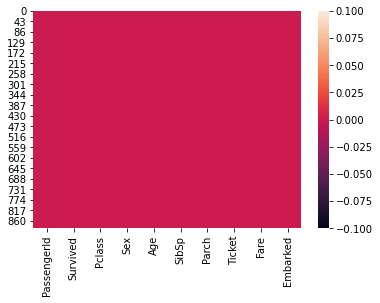

In [107]:
sns.heatmap(ship.isnull())

Dataset has cleaned now

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
le = LabelEncoder()

list1 = ['Sex', 'Ticket', 'Embarked']
for encode in list1:
    ship[encode] = le.fit_transform(ship[encode].astype(str))

In [110]:
ship

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,2
1,2,1,1,0,38.0,1,0,596,71.2833,0
2,3,1,3,0,26.0,0,0,669,7.9250,2
3,4,1,1,0,35.0,1,0,49,53.1000,2
4,5,0,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,101,13.0000,2
887,888,1,1,0,19.0,0,0,14,30.0000,2
888,889,0,3,0,28.0,1,2,675,23.4500,2
889,890,1,1,1,26.0,0,0,8,30.0000,0


# EDA

# ScatterPlot

<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>

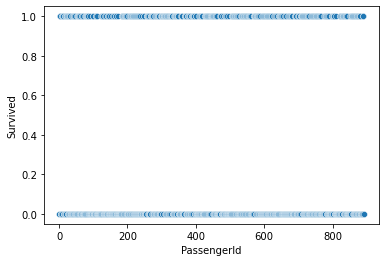

In [111]:
sns.scatterplot(x ='PassengerId', y ='Survived', data = ship)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

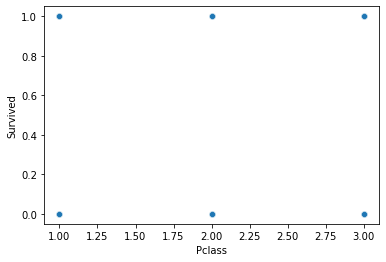

In [112]:
sns.scatterplot(x ='Pclass', y = 'Survived', data = ship)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

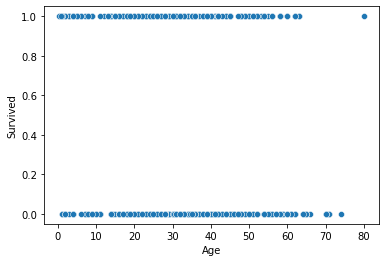

In [113]:
sns.scatterplot(x = 'Age', y='Survived', data = ship)

We can see the Age is equally distributed in the range 0 to 68.

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

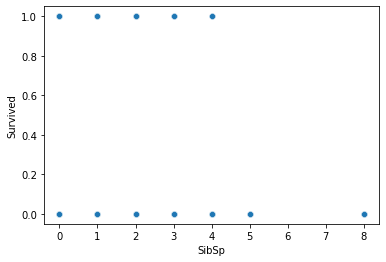

In [114]:
sns.scatterplot(x = 'SibSp', y ='Survived', data = ship)

We can see the SibSp is equally distributed in the range 0 to 5.

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

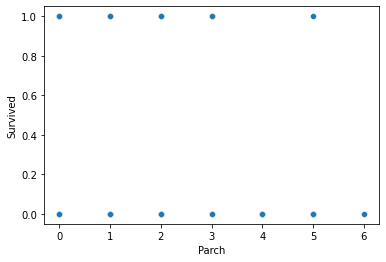

In [115]:
sns.scatterplot(x ='Parch', y='Survived', data = ship)

We can see the Parch is equally distributed in the range 0 to 6.

<AxesSubplot:xlabel='Ticket', ylabel='Survived'>

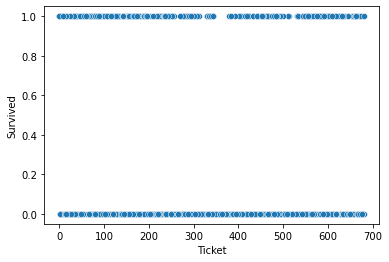

In [116]:
sns.scatterplot(x = 'Ticket', y= 'Survived', data = ship)

We can see the Ticket is equally distributed in the range 0 to 690.

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

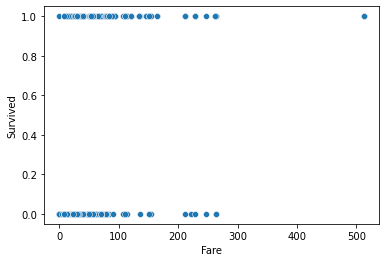

In [117]:
sns.scatterplot(x ='Fare', y='Survived', data = ship)

We can see the Fare is equally distributed in the range 0 to 150.

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

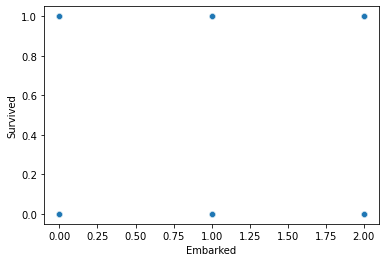

In [118]:
sns.scatterplot(x ='Embarked', y='Survived', data = ship)

We can see the Embarked is equally distributed in the range 0 to 2.

# Statistics

In [119]:
ship.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,338.528620,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,200.850657,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


High standard deviation are present in PassengerId, Age, Ticket, Fare variables, means data is spread too much.

Age, sibSp, Parch and Fare have large gap between 75 percentile and Max, means outliers are present.

In [120]:
ship.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.510245
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.264823
dtype: float64

<AxesSubplot:>

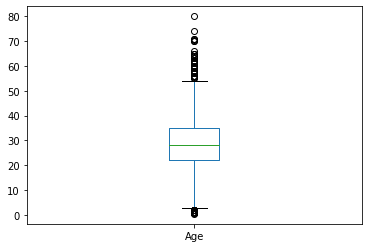

In [121]:
ship['Age'].plot.box()

<AxesSubplot:>

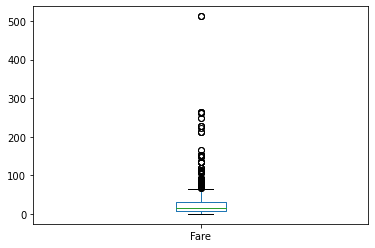

In [122]:
ship['Fare'].plot.box()

PassengerId       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Survived       AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Pclass          AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Sex            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Age            AxesSubplot(0.766379,0.536818;0.133621x0.343182)
SibSp                AxesSubplot(0.125,0.125;0.133621x0.343182)
Parch             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Ticket             AxesSubplot(0.44569,0.125;0.133621x0.343182)
Fare              AxesSubplot(0.606034,0.125;0.133621x0.343182)
Embarked          AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

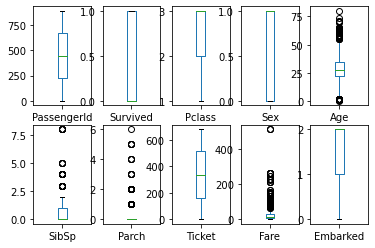

In [123]:
ship.plot(kind = 'box', subplots = True, layout = (2,5))

# Correlation

In [124]:
ship.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.108262
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.018754
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.001729,-0.224719,1.000000


<AxesSubplot:>

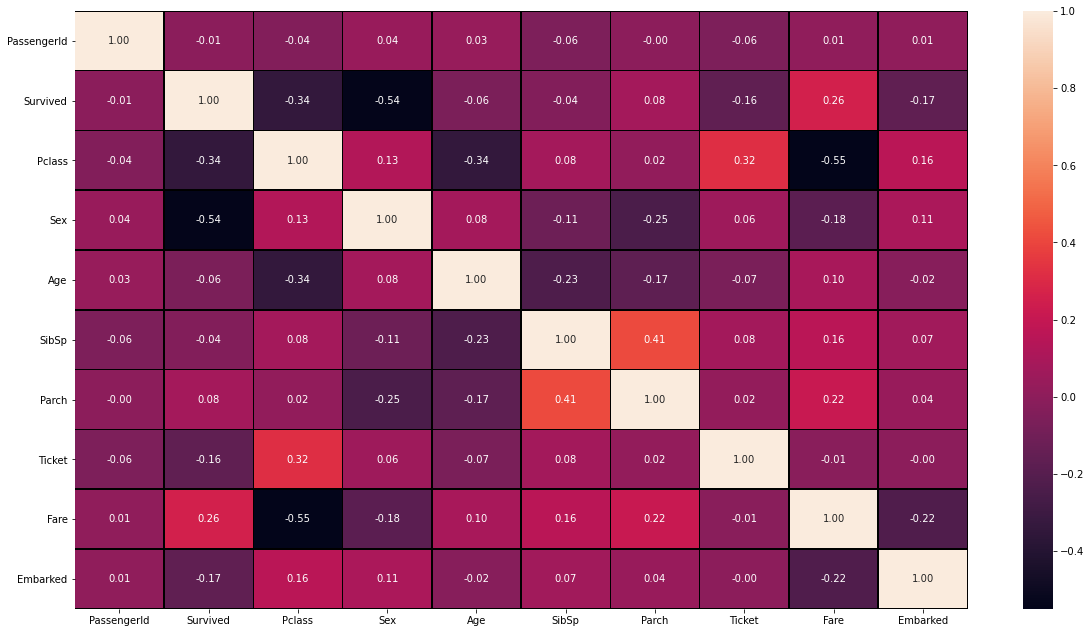

In [125]:
plt.figure(figsize = (20,11))
sns.heatmap(ship.corr(), annot = True, linewidth = 0.5, linecolor = 'black', fmt = '.2f')

# Removing Outliers:

In [126]:
from scipy.stats import zscore
z = np.abs(zscore(ship))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.91896631, 0.50244517,
        0.58595414],
       [1.72622007, 1.2669898 , 1.56610693, ..., 1.28262456, 0.78684529,
        1.9423032 ],
       [1.72233219, 1.2669898 , 0.82737724, ..., 1.64628282, 0.48885426,
        0.58595414],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 1.67617254, 0.17626324,
        0.58595414],
       [1.72622007, 1.2669898 , 1.56610693, ..., 1.64656796, 0.04438104,
        1.9423032 ],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.63501397, 0.49237783,
        0.67817453]])

In [127]:
threshold = 3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([6, 5, 6, 8, 5, 5, 5, 5, 6, 8, 4, 4, 8, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       8, 5, 5, 5, 8, 8, 5, 8, 6, 8, 8, 5, 6, 6, 8, 5, 4, 8, 5, 5, 8, 6,
       6, 4, 6, 4, 6, 8, 5, 5, 8, 8, 8, 8, 6, 8, 8, 4, 6, 8, 5, 5, 5, 5,
       5, 5, 4, 6, 5, 6], dtype=int64))


In [128]:
z[13][6]

5.73284383018578

In [129]:
z[863][5]

6.784163299176891

In [130]:
ship.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.510245
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.264823
dtype: float64

In [131]:
ship_new= ship[(z<3).all(axis=1)]
print(ship.shape)
print(ship_new.shape)

(891, 10)
(820, 10)


# Percentage data Loss

In [132]:
loss = (891-820)/891*100
loss

7.968574635241302

# Normal Distribution Curve

<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

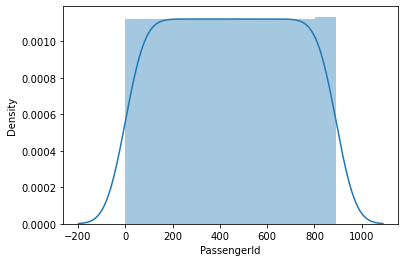

In [133]:
sns.distplot(ship['PassengerId'])

<AxesSubplot:xlabel='Survived', ylabel='Density'>

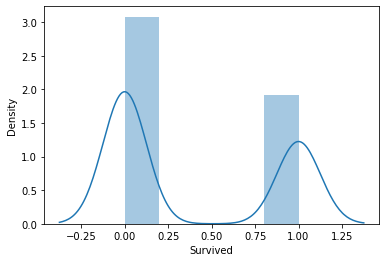

In [134]:
sns.distplot(ship['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

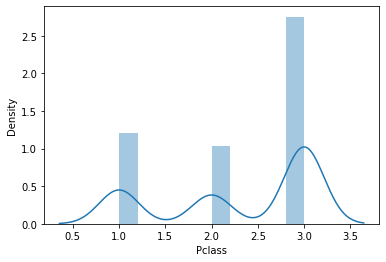

In [135]:
sns.distplot(ship['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

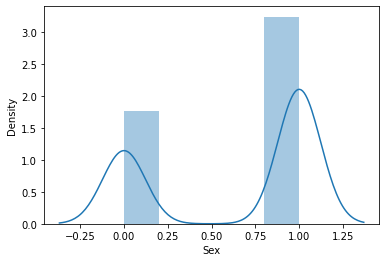

In [136]:
sns.distplot(ship['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

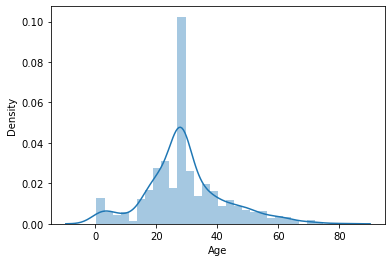

In [137]:
sns.distplot(ship['Age'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

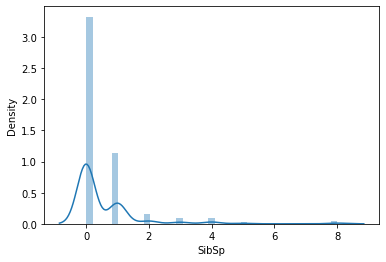

In [138]:
sns.distplot(ship['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

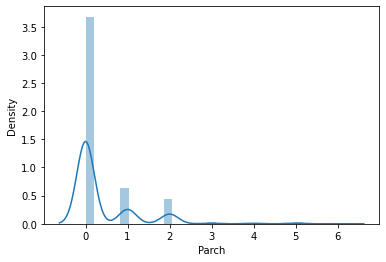

In [139]:
sns.distplot(ship['Parch'])

<AxesSubplot:xlabel='Ticket', ylabel='Density'>

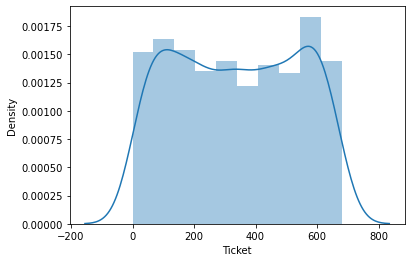

In [140]:
sns.distplot(ship['Ticket'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

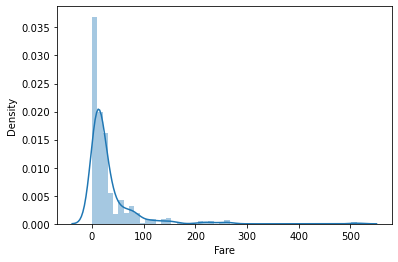

In [141]:
sns.distplot(ship['Fare'])

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

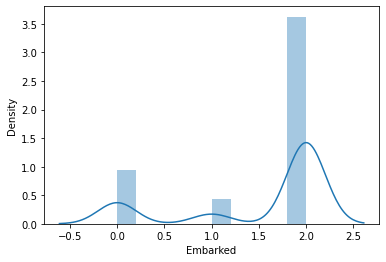

In [142]:
sns.distplot(ship['Embarked'])

Divide data in feature and vector

In [143]:
x = ship_new.drop(['Survived'], axis = 1)
y = ship_new['Survived']

# Transforming data to Remove Skewness

In [144]:
from sklearn.preprocessing import power_transform
x = power_transform(x , method = 'yeo-johnson')

In [145]:
x

array([[-2.15631324,  0.87283049,  0.72203588, ...,  0.93404121,
        -0.83470177,  0.60778719],
       [-2.14032052, -1.47067587, -1.38497273, ...,  1.21487665,
         1.55364494, -1.78767552],
       [-2.12579352,  0.87283049, -1.38497273, ...,  1.48411797,
        -0.74331399,  0.60778719],
       ...,
       [ 1.56705476,  0.87283049, -1.38497273, ...,  1.50578647,
         0.39490799,  0.60778719],
       [ 1.57009584, -1.47067587,  0.72203588, ..., -1.99052285,
         0.65432009, -1.78767552],
       [ 1.57313595,  0.87283049,  0.72203588, ...,  0.70528334,
        -0.76629016, -1.24967343]])

In [146]:
x.shape

(820, 9)

In [147]:
y.shape

(820,)

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()

# Splitting the dataframe:

In [149]:
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = i, test_size = 0.20)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
        
        print("At random state", i, "The model performs very well")
        print("Random_state:-", i)
        
        print("Training r2_score is:-", accuracy_score(y_train, pred_train)*100)
        
        print("Testing r2_score is:-", accuracy_score(y_test, pred_test)*100)

At random state 26 The model performs very well
Random_state:- 26
Training r2_score is:- 79.8780487804878
Testing r2_score is:- 79.8780487804878
At random state 44 The model performs very well
Random_state:- 44
Training r2_score is:- 80.48780487804879
Testing r2_score is:- 80.48780487804879
At random state 269 The model performs very well
Random_state:- 269
Training r2_score is:- 79.8780487804878
Testing r2_score is:- 79.8780487804878
At random state 299 The model performs very well
Random_state:- 299
Training r2_score is:- 79.8780487804878
Testing r2_score is:- 79.8780487804878
At random state 301 The model performs very well
Random_state:- 301
Training r2_score is:- 80.48780487804879
Testing r2_score is:- 80.48780487804879
At random state 410 The model performs very well
Random_state:- 410
Training r2_score is:- 80.48780487804879
Testing r2_score is:- 80.48780487804879
At random state 465 The model performs very well
Random_state:- 465
Training r2_score is:- 80.48780487804879
Testing

In [163]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 817)

In [164]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63       108
           1       0.33      0.38      0.35        56

    accuracy                           0.53       164
   macro avg       0.49      0.49      0.49       164
weighted avg       0.54      0.53      0.54       164



In [165]:
lr.score(x_train, y_train)

0.801829268292683

In [166]:
pred = lr.predict(x_test)

In [167]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [168]:
print('error:')

print('Mean absolute error: ', mean_absolute_error(y_test, pred))
print('Mean squared error: ', mean_squared_error(y_test, pred))

print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))

error:
Mean absolute error:  0.18902439024390244
Mean squared error:  0.18902439024390244
Root Mean Squared Error:  0.43476935292624114


# cross validation score for LR

In [169]:
pred = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test, pred)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    
    print("At cv:-", j)
    print("Cross validation score is:-", lsc*100)
    print("accuracy_score is:-", lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 76.95121951219512
accuracy_score is:- 81.09756097560977


At cv:- 3
Cross validation score is:- 79.75633450086006
accuracy_score is:- 81.09756097560977


At cv:- 4
Cross validation score is:- 79.8780487804878
accuracy_score is:- 81.09756097560977


At cv:- 5
Cross validation score is:- 79.14634146341463
accuracy_score is:- 81.09756097560977


At cv:- 6
Cross validation score is:- 79.63628882209818
accuracy_score is:- 81.09756097560977


At cv:- 7
Cross validation score is:- 79.26677841932079
accuracy_score is:- 81.09756097560977


At cv:- 8
Cross validation score is:- 79.3927279649724
accuracy_score is:- 81.09756097560977


At cv:- 9
Cross validation score is:- 79.99814195466368
accuracy_score is:- 81.09756097560977




In [170]:
lsscore_selected = cross_val_score(lr,x,y,cv= 4).mean()
print("The cv score is: ", lsscore_selected, "\nThe accuracy score is: ", lss)

The cv score is:  0.7987804878048781 
The accuracy score is:  0.8109756097560976


In [173]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []

models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

In [174]:

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0,shuffle=True)
    cv_result = cross_val_score(model,x_train,y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Naive Bayes: 76.67365967365967
K-Nearest Neighbour: 79.1095571095571
Decision Tree: 74.990675990676
Support Vector Machine-linear: 78.03263403263404
Support Vector Machine-rbf: 80.17249417249417
Random Forest: 81.41025641025641
MLP: 78.66666666666667
AdaBoostClassifier: 77.74825174825175
GradientBoostingClassifier: 81.24708624708624


Best Model is Random Forest

# AUC-ROC Curve

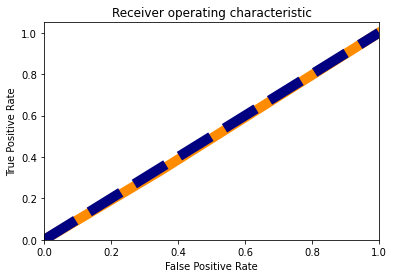

In [175]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy',lw=10,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')


plt.show()

# Model Saving:

In [178]:
import pickle
filename = 'titanic_train_project.pkl'
pickle.dump(lr, open(filename, 'wb'))

# Conclusion

In [177]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
df_com = pd.DataFrame({"original": a, "predicted": predicted}, index = range(len(a)))
df_com

,original,predicted
0,1,1
1,1,1
2,0,0
3,0,1
4,1,1
...,...,...
159,0,1
160,0,0
161,0,0
162,0,0
